In [ ]:
from dask.distributed import Client

client = Client(n_workers=4)
client

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63510 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:63510/status,
Dashboard: http://127.0.0.1:63510/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63511,Workers: 4
Dashboard: http://127.0.0.1:63510/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:63523,Total threads: 2
Dashboard: http://127.0.0.1:63526/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:63514,


2025-04-16 19:21:05,504 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 04cde07d2468a3e4ffe58a9f3addb918 initialized by task ('shuffle-transfer-04cde07d2468a3e4ffe58a9f3addb918', 6) executed on worker tcp://127.0.0.1:63524
2025-04-16 19:21:07,177 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 04cde07d2468a3e4ffe58a9f3addb918 deactivated due to stimulus 'task-finished-1744802467.174557'
2025-04-16 19:21:11,617 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 40cebd0ad3356fcb1a72ee3c2a157466 initialized by task ('shuffle-transfer-40cebd0ad3356fcb1a72ee3c2a157466', 0) executed on worker tcp://127.0.0.1:63523
2025-04-16 19:21:12,442 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 40cebd0ad3356fcb1a72ee3c2a157466 deactivated due to stimulus 'task-finished-1744802472.441813'


In [2]:
import os
import dask
import dask.dataframe as dd

<font size="4">**1. DASK Dataframe Open All Files at Once**</font>

In [3]:
os.chdir("/Users/portia/Documents/AAA-College/AI/ai4astro/dask-tutorial-main")

In [4]:
file_path = os.path.abspath(os.path.join("data", "nycflights", "*.csv"))

ddf = dd.read_csv(
    file_path,
    parse_dates={"Date": [0, 1, 2]},
    dtype={"TailNum": str, "CRSElapsedTime": float, "Cancelled": bool},
)

ddf

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:594: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,string,int64,string,float64,float64,float64,float64,float64,string,string,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
ddf.tail()

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


<font size="4">**2. Total Delayed Flights Count for Three Airports Over a Decade**</font>

In [6]:
origin_values = ddf.Origin.unique().compute()
print("Unique values in Origin column:", origin_values)

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Suppo

Unique values in Origin column: 0    EWR
0    JFK
0    LGA
Name: Origin, dtype: string


In [7]:
# Filter Delayed Flights（ArrDelay > 0）
delayed_flights = ddf[ddf.ArrDelay > 0]

In [8]:
# Group by Origin to Count Delayed Flights
delayed_counts = delayed_flights.groupby("Origin").size().compute()

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Suppo

In [9]:
print("Total Delayed Flights for Three Airports Over a Decade：")
print(delayed_counts)

Total Delayed Flights for Three Airports Over a Decade：
Origin
EWR    578051
JFK    209527
LGA    462010
dtype: int64


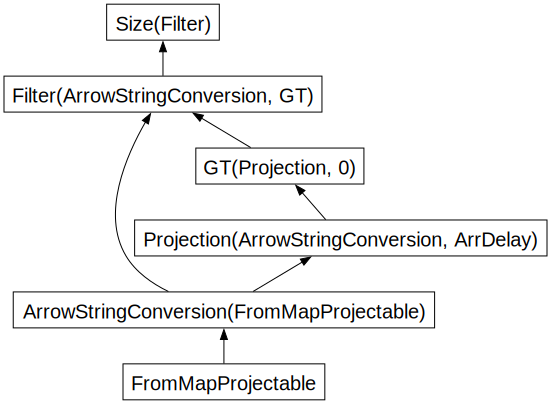

In [10]:
delayed_flights.groupby("Origin").size().visualize()

<font size="4">**3. 统计10年中，各机场延误次数最多的前3个月份**</font>

In [11]:
ddf['Month'] = ddf.Date.dt.month
ddf['Year'] = ddf.Date.dt.year

In [12]:
# Filter
delayed_flights = ddf[ddf.ArrDelay > 0]

# Group
monthly_delays = delayed_flights.groupby(['Origin', 'Year', 'Month']).size().compute()

#Convert to Dataframe
monthly_delays_df = monthly_delays.reset_index(name='delay_count')

# Group、sort
grouped_delays = monthly_delays_df.groupby('Origin').apply(
    lambda x: x.sort_values('delay_count', ascending=False)
).reset_index(drop=True)

/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/portia/anaconda3/envs/dask-tutorial/lib/python3.10/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Suppo

In [13]:
# Get the top 3 months with highest delays for each airport
top_delays_by_airport = {}
for airport in ['EWR', 'JFK', 'LGA']:
    airport_data = grouped_delays[grouped_delays.Origin == airport]
    top_3 = airport_data.head(3)
    top_delays_by_airport[airport] = top_3

In [14]:
print("Top 3 months with highest flight delays by airport:")
for airport, top_data in top_delays_by_airport.items():
    print(f"\n{airport}:")
    for _, row in top_data.iterrows():
        print(f"  Year: {row['Year']}, Month: {row['Month']}, Delayed Flights: {row['delay_count']}")

Top 3 months with highest flight delays by airport:

EWR:
  Year: 1998, Month: 6, Delayed Flights: 6602
  Year: 1996, Month: 7, Delayed Flights: 6584
  Year: 1996, Month: 12, Delayed Flights: 6347

JFK:
  Year: 1996, Month: 7, Delayed Flights: 3124
  Year: 1996, Month: 8, Delayed Flights: 2728
  Year: 1992, Month: 8, Delayed Flights: 2573

LGA:
  Year: 1999, Month: 10, Delayed Flights: 4986
  Year: 1999, Month: 6, Delayed Flights: 4976
  Year: 1992, Month: 7, Delayed Flights: 4944


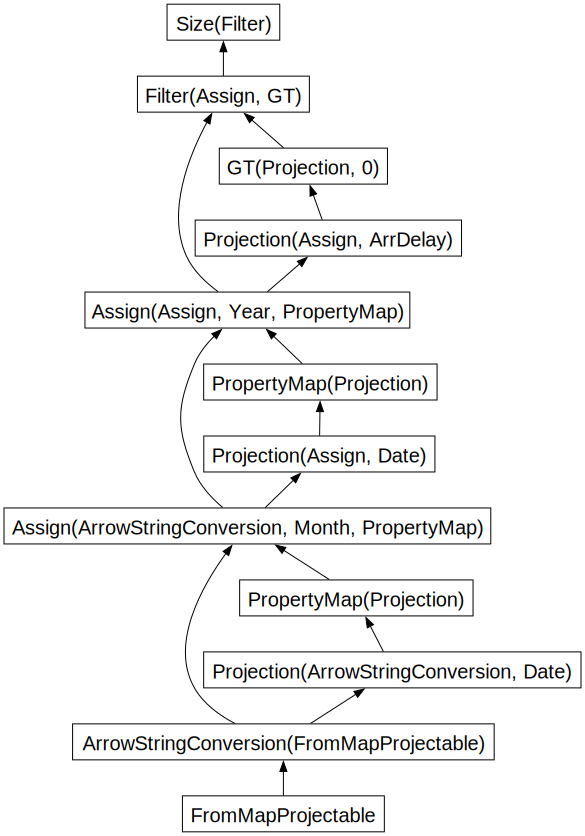

In [15]:
delayed_flights.groupby(['Origin', 'Year', 'Month']).size().visualize()

In [16]:
client.close()